<a href="https://colab.research.google.com/github/arnaldourbina/desafio_telecom_x_2/blob/main/Desafio_TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado en desafio anterior

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_telecom2 = pd.read_csv('/content/data_telecom_x2.csv')
df_telecom2

,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias,tiempo_de_contrato
0,0002-ORFBO,0,female,0,1,1,9.0,1,0,dsl,...,1,1,0,one year,1,mailed check,65.60,593.30,2.186667,9.044207
1,0003-MKNFE,0,male,0,0,0,9.0,1,1,dsl,...,0,0,1,month-to-month,0,mailed check,59.90,542.40,1.996667,9.055092
2,0004-TLHLJ,1,male,0,0,0,4.0,1,0,fiber optic,...,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333,3.800406
3,0011-IGKFF,1,male,1,1,0,13.0,1,0,fiber optic,...,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667,12.631122
4,0013-EXCHZ,1,female,1,1,0,3.0,1,0,fiber optic,...,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.796667,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,female,0,0,0,13.0,1,0,dsl,...,1,0,0,one year,0,mailed check,55.15,742.90,1.838333,13.470535
7039,9992-RRAMN,1,male,0,1,0,22.0,1,1,fiber optic,...,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.836667,22.017626
7040,9992-UJOEL,0,male,0,0,0,2.0,1,0,dsl,...,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667,1.843936
7041,9993-LHIEB,0,male,0,1,1,67.0,1,0,dsl,...,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667,68.204127


## Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [3]:
proporcion_canc = df_telecom2['cancelacion'].value_counts(normalize=True)*100
proporcion_canc

,proportion
cancelacion,
0,73.463013
1,26.536987


# Eliminación de Columnas Irrelevantes

   ### Preparar los datos para el modelado (tratamiento, codificación, normalización).


In [4]:
df_telecom2 = df_telecom2.drop(['id'], axis=1)


In [5]:
df_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cancelacion            7043 non-null   int64  
 1   genero                 7043 non-null   object 
 2   mayor_de_65            7043 non-null   int64  
 3   pareja                 7043 non-null   int64  
 4   dependientes           7043 non-null   int64  
 5   meses_de_contrato      7043 non-null   float64
 6   servicio_telefonico    7043 non-null   int64  
 7   lineas_multiples       7043 non-null   int64  
 8   servicio_internet      7043 non-null   object 
 9   seguridad_en_linea     7043 non-null   int64  
 10  Soporte_en_linea       7043 non-null   int64  
 11  protecc_disp           7043 non-null   int64  
 12  soporte_tecnico        7043 non-null   int64  
 13  servicio_tv            7043 non-null   int64  
 14  servicio_peliculas     7043 non-null   int64  
 15  tipo

In [6]:
#columnas_categoricas = df_telecom2.select_dtypes(include=['object']).columns
#columnas_categoricas

In [7]:
#df_dummies = pd.get_dummies(df_telecom2,columns=columnas_categoricas, drop_first=True)
#df_dummies.head()

##    Realizar análisis de correlación y selección de variables.


### Seleccion de Variables

In [8]:
X = df_telecom2.drop('cancelacion', axis=1)
y = df_telecom2.cancelacion

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


### Transformando variables explicativas

In [10]:
columnas = X.columns

In [11]:
met_one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                      ['genero','servicio_internet','tipo_contrato','metodo_pago']),
                                      remainder='passthrough',
                                      sparse_threshold=0,
                                      force_int_remainder_cols=False)

In [12]:
X = met_one_hot.fit_transform(X)


In [13]:
met_one_hot.get_feature_names_out(columnas)

array(['onehotencoder__genero_male',
       'onehotencoder__servicio_internet_dsl',
       'onehotencoder__servicio_internet_fiber optic',
       'onehotencoder__servicio_internet_no',
       'onehotencoder__tipo_contrato_month-to-month',
       'onehotencoder__tipo_contrato_one year',
       'onehotencoder__tipo_contrato_two year',
       'onehotencoder__metodo_pago_bank transfer (automatic)',
       'onehotencoder__metodo_pago_credit card (automatic)',
       'onehotencoder__metodo_pago_electronic check',
       'onehotencoder__metodo_pago_mailed check',
       'remainder__mayor_de_65', 'remainder__pareja',
       'remainder__dependientes', 'remainder__meses_de_contrato',
       'remainder__servicio_telefonico', 'remainder__lineas_multiples',
       'remainder__seguridad_en_linea', 'remainder__Soporte_en_linea',
       'remainder__protecc_disp', 'remainder__soporte_tecnico',
       'remainder__servicio_tv', 'remainder__servicio_peliculas',
       'remainder__facturas_electronicas',
 

In [14]:
pd.DataFrame(X, columns=met_one_hot.get_feature_names_out(columnas))


,onehotencoder__genero_male,onehotencoder__servicio_internet_dsl,onehotencoder__servicio_internet_fiber optic,onehotencoder__servicio_internet_no,onehotencoder__tipo_contrato_month-to-month,onehotencoder__tipo_contrato_one year,onehotencoder__tipo_contrato_two year,onehotencoder__metodo_pago_bank transfer (automatic),onehotencoder__metodo_pago_credit card (automatic),onehotencoder__metodo_pago_electronic check,...,remainder__Soporte_en_linea,remainder__protecc_disp,remainder__soporte_tecnico,remainder__servicio_tv,remainder__servicio_peliculas,remainder__facturas_electronicas,remainder__total_pagos_mensuales,remainder__ingreso_total_cliente,remainder__cuentas_diarias,remainder__tiempo_de_contrato
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.186667,9.044207
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,1.996667,9.055092
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.463333,3.800406
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.266667,12.631122
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.796667,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.838333,13.470535
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.836667,22.017626
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.676667,1.843936
7041,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.261667,68.204127


### Transformando variable respuesta

In [15]:
y = y.to_numpy(y)


In [16]:
y

array([0, 0, 1, ..., 0, 0, 0])

##  Entrenar dos o más modelos de clasificación.

### creando datos de entrenamiento y prueba

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creando modelo de referencia - Baseline

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.73450070989115

### Creando modelo de arbol de decisión

In [42]:
valores_columnas = met_one_hot.get_feature_names_out()

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [26]:
modelo_arbol.score(X_test, y_test)

0.7283483199242783

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

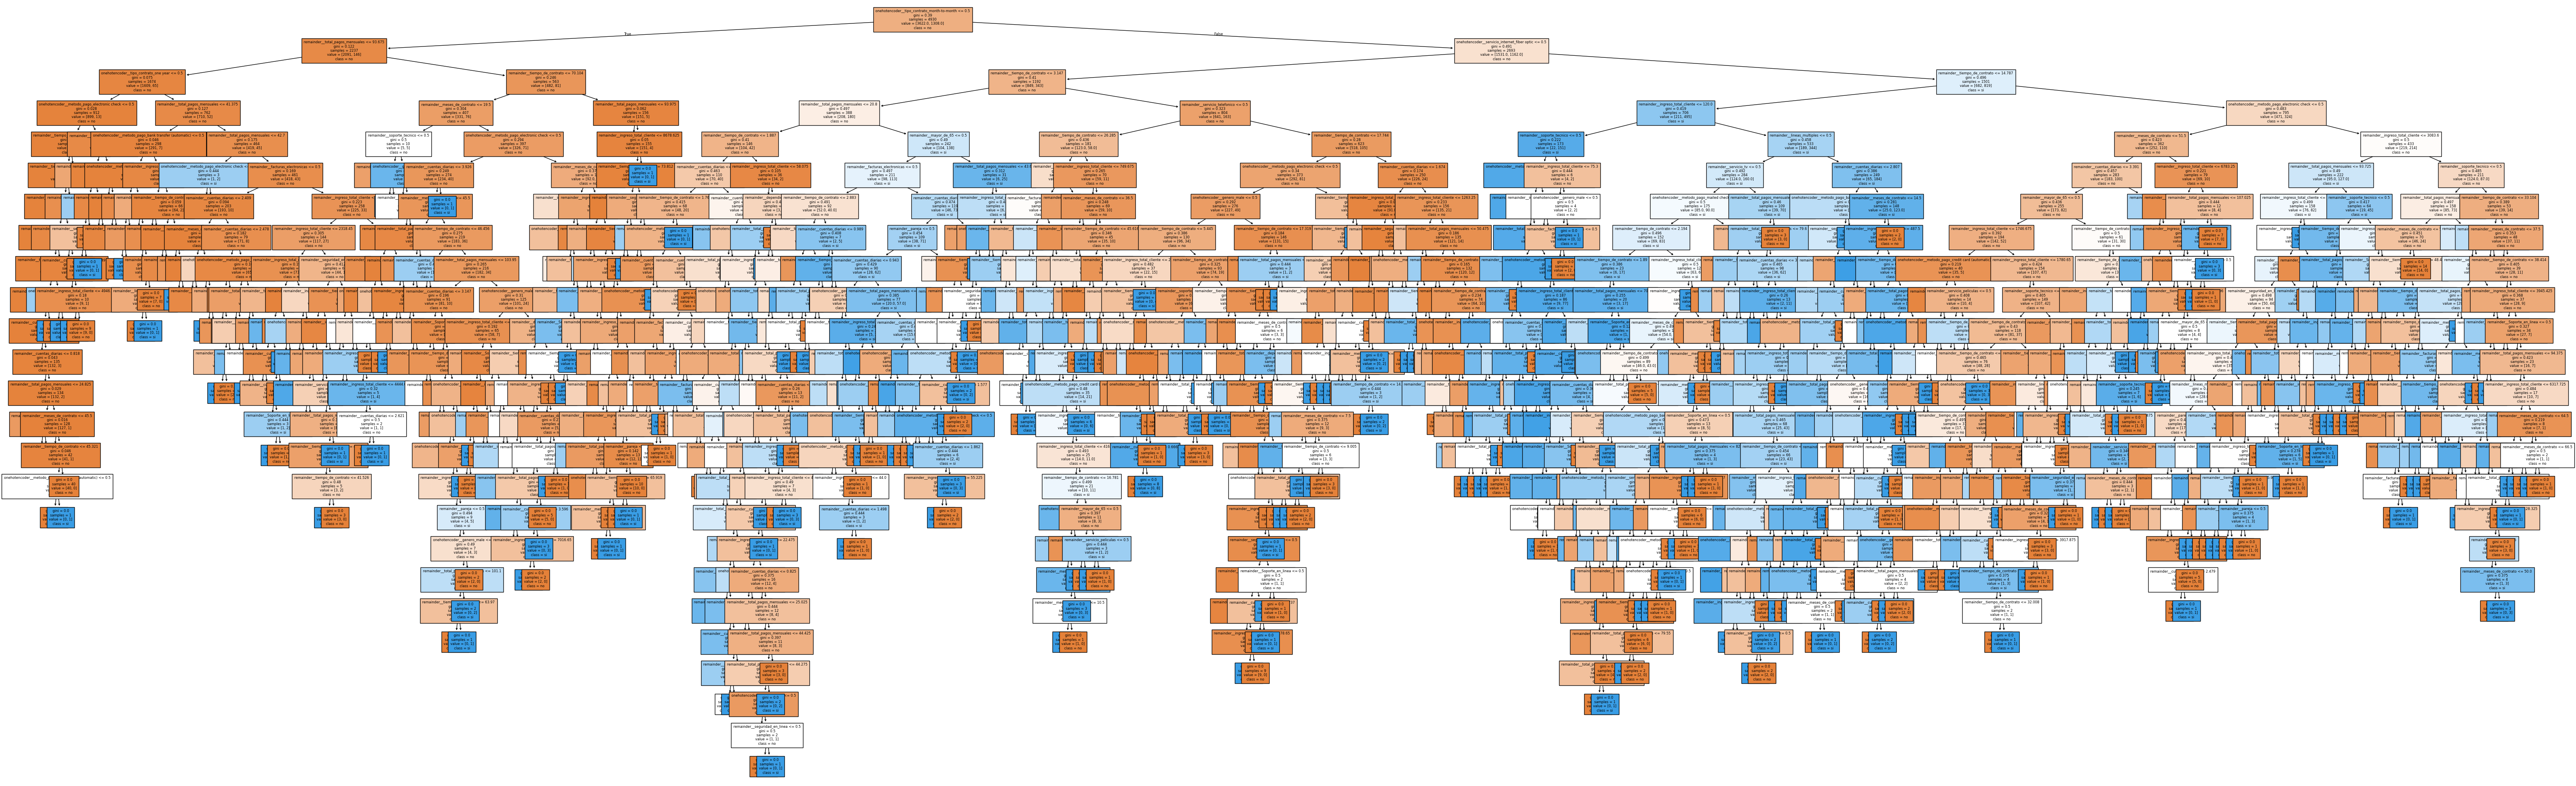

In [43]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [46]:
modelo_arbol.score(X_train, y_train)

0.7922920892494929

In [47]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [48]:
modelo_arbol.score(X_test, y_test)

0.7870326549929011

### Modelo KNN

#### Normalizando datos para usar en modelo KNN

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train)
X_test_norm = normalizacion.transform(X_test)

In [52]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.578475,0.128679,0.578475,0.188918
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.514200,0.040001,0.514200,0.064138
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.566019,0.296633,0.566019,0.442737
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.674639,0.563110,0.674639,0.734064
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.310912,0.013207,0.310912,0.029886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.625810,0.379088,0.625810,0.523995
4926,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.061286,0.153262,0.061286,0.700691
4927,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023418,0.052085,0.023418,0.281735
4928,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.062780,0.065833,0.062780,0.299153


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()


In [55]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [56]:
knn.score(X_test_norm, y_test)

0.759110269758637





   

    Evaluar el rendimiento de los modelos con métricas.

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

